### Scenario ###

As a junior data scientist at a retail analytics firm, your manager tasks you with building a linear regression model to predict weekly sales (yyy) based on advertising spend (xxx). The company needs this model to help allocate advertising budgets more efficiently. Before presenting the model to stakeholders, you must ensure it meets all the assumptions of linear regression. If the assumptions are violated, the model's predictions could be inaccurate, leading to poor decision-making.

To approach this systematically, you will:

1. Fit the linear regression model.
2. Use diagnostic plots to verify that the four key assumptions (linearity, independence of errors, normality of errors, and equal variances) are satisfied.

**Step 1:** import required libraries

In [1]:
import numpy as np  
import pandas as pd  
import statsmodels.api as sm  
import matplotlib.pyplot as plt  
import seaborn as sns 

**Step 2:** generate sample data

In [2]:
np.random.seed(42)  
x = np.random.rand(100) * 10  # Advertising Spend (in $1000s)
y = 2.5 * x + np.random.normal(size=100) * 3  # Sales with noise  

data = pd.DataFrame({'x': x, 'y': y}) 

**Step 3:** fit the linear regression model

In [3]:
X = sm.add_constant(data['x'])  # Adds an intercept term
model = sm.OLS(data['y'], X).fit()  
data['y_pred'] = model.predict(X)  # Predicted values  
residuals = model.resid  # Residuals (errors)

**Step 4:** check assumptions

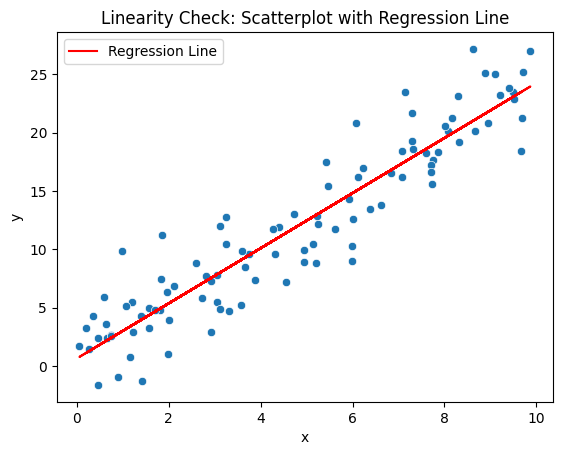

In [4]:
sns.scatterplot(x='x', y='y', data=data)  
plt.plot(data['x'], data['y_pred'], color='red', label='Regression Line')  
plt.title('Linearity Check: Scatterplot with Regression Line')  
plt.legend()
plt.show()

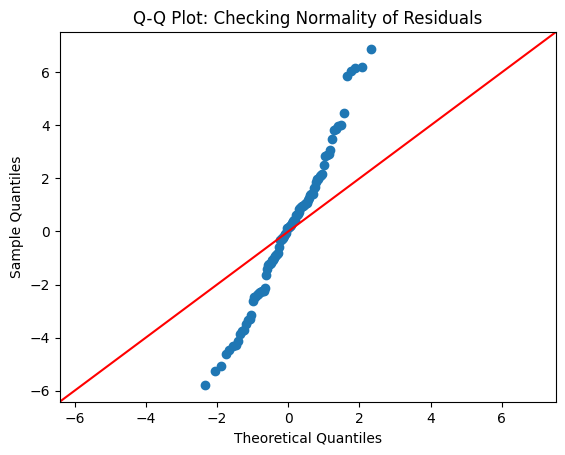

In [7]:
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot: Checking Normality of Residuals')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

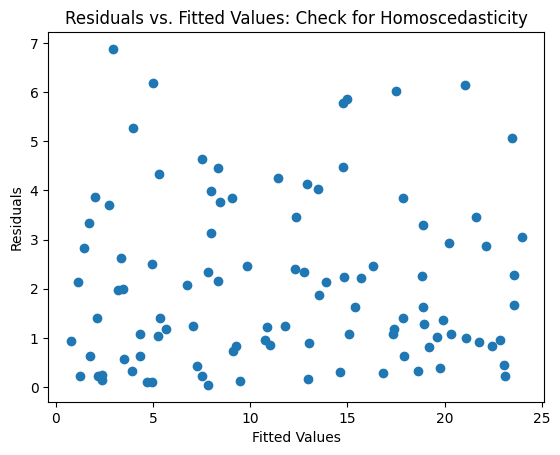

In [8]:
plt.scatter(data['y_pred'], np.abs(residuals))
plt.title('Residuals vs. Fitted Values: Check for Homoscedasticity')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show

**Step 5:** interpret results

Review the diagnostics:

- *Linearity:* The scatterplot should confirm a linear trend.
- *Independence of Errors:* The residuals plot should show random scatter around zero.
- *Normality of Errors:* The Q-Q plot should indicate normally distributed residuals.
- *Equal Variances:* Residual spread should be consistent across all fitted values.

Carefully validating these assumptions ensures the advertising spend vs. sales model is reliable and robust.